# Description of the data 
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
sns.set_style("whitegrid")
%matplotlib inline

In [30]:
train_data=pd.read_csv("train.csv.zip")
test_data=pd.read_csv("test.csv.zip")

In [31]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x=train_data.drop("label",axis=1)
y=train_data["label"]

In [33]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

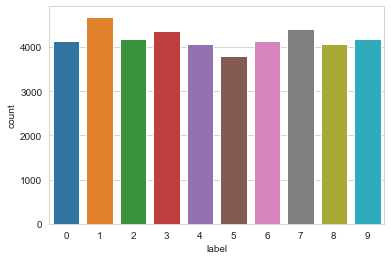

In [34]:
sns.countplot(y)

# Normalisation the image pixels by dividing by 255.0

In [35]:
x=x/255.0
test_data=test_data/255.0

# Reshapeing of traing and testing image pixels

In [9]:
x=x.values.reshape(-1,28,28,1)
test_data=test_data.values.reshape(-1,28,28,1)

In [10]:
# Ploting my training images and checking the number on it from actual value

7


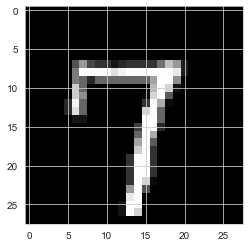

In [11]:
plt.imshow(x[6].reshape(28,28),cmap="gray")
print(y[6])

# Split the data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Train the model

In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    ])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [17]:
x_train[32].shape

(28, 28, 1)

In [18]:
model.fit(x_train,y_train,epochs=10)

Train on 33600 samples
Epoch 1/10
33600/33600 [==============================] - 76s 2ms/sample - loss: 0.1694 - accuracy: 0.9446
Epoch 2/10
33600/33600 [==============================] - 74s 2ms/sample - loss: 0.0497 - accuracy: 0.9850
Epoch 3/10
33600/33600 [==============================] - 74s 2ms/sample - loss: 0.0367 - accuracy: 0.9890
Epoch 4/10
33600/33600 [==============================] - 75s 2ms/sample - loss: 0.0278 - accuracy: 0.9914
Epoch 5/10
33600/33600 [==============================] - 74s 2ms/sample - loss: 0.0218 - accuracy: 0.9937
Epoch 6/10
33600/33600 [==============================] - 75s 2ms/sample - loss: 0.0189 - accuracy: 0.9945
Epoch 7/10
33600/33600 [==============================] - 75s 2ms/sample - loss: 0.0162 - accuracy: 0.9955
Epoch 8/10
33600/33600 [==============================] - 76s 2ms/sample - loss: 0.0153 - accuracy: 0.9957
Epoch 9/10
33600/33600 [==============================] - 76s 2ms/sample - loss: 0.0120 - accuracy: 0.9970
Epoch 10/10
33

In [19]:
predictions=model.predict(x_test).argmax(axis=1)

In [20]:
predictions

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [21]:
(np.sum(y_test==predictions)/predictions.shape[0])*100

98.73809523809524

In [22]:
output=model.predict(test_data).argmax(axis=1)
output=pd.Series(output,name="Label")

# My submission

In [23]:
submission=pd.concat([pd.Series(range(1,28001),name = "ImageId"),output],axis = 1)

In [26]:
submission.to_csv("My_digit_recognizer",index=False)